In [1]:
import pandas as pd

In [2]:
air_quality_no2 = pd.read_csv('air_quality_no2_long.csv', parse_dates=True)
air_quality_no2 = air_quality_no2[['date.utc','location','parameter','value']]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [3]:
air_quality_pm25 = pd.read_csv('air_quality_pm25_long.csv', parse_dates=True)
air_quality_pm25 = air_quality_pm25[['date.utc', 'location','parameter', 'value']]
air_quality_pm25.head()


,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


# Combine Data from Multiple Tables
Concatenating Objects
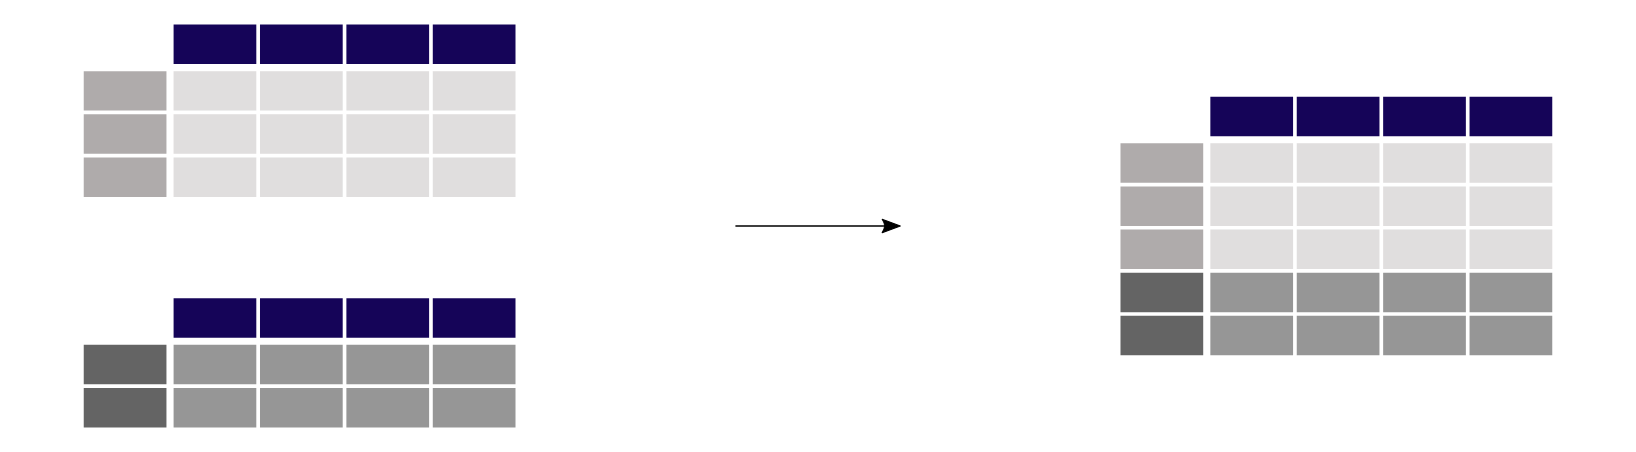


In [4]:
#Combine the measurements of NO2 and PM25, 
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


The concat() function performs concatenation operations of multiple tables along one of the axes (row-wise or column-wise).

In [6]:
#Checking the shape of the original and the concatenated tables to verify the operation
print('Shape of the air_quality_pm25 table is: ', air_quality_pm25.shape)
print('Shape of the air_quality_no2 table is: ', air_quality_no2.shape)
print('Shape of the air_quality table is: ', air_quality.shape)

Shape of the air_quality_pm25 table is:  (1110, 4)
Shape of the air_quality_no2 table is:  (2068, 4)
Shape of the air_quality table is:  (3178, 4)


# Join Tables Using a Common Identifier
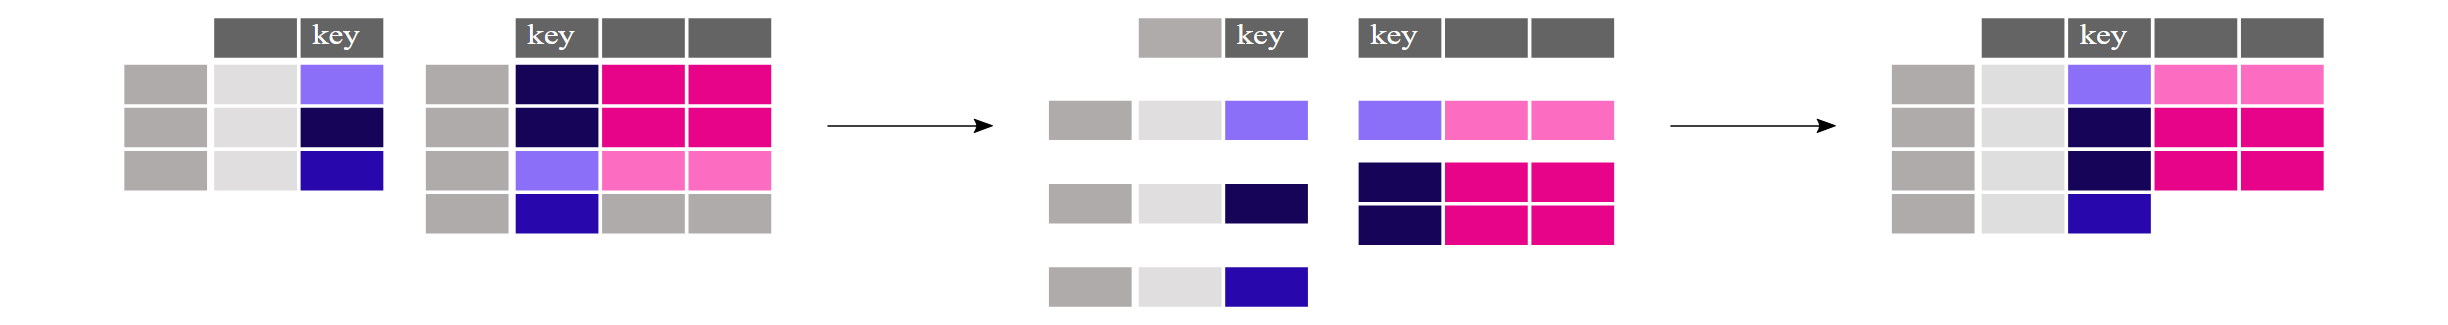

In [7]:
stations_coord = pd.read_csv('air_quality_stations.csv')
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


The stations used in this example (FR04014, BETR801 and London Westminster) are just three entries enlisted in the metadata table. We only want to add the coordinates of these three to the measurements table, each on the corresponding rows of the air_quality table.

In [8]:
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [11]:
air_quality = pd.merge(air_quality, stations_coord, how='left', on='location')
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude_x,coordinates.longitude_x,coordinates.latitude_y,coordinates.longitude_y,coordinates.latitude,coordinates.longitude
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182


Using the merge() function, for each of the rows in the air_quality table, the corresponding coordinates are added from the air_quality_stations_coord table. Both tables have the column location in common which is used as a key to combine the information. By choosing the left join, only the locations available in the air_quality (left) table, i.e. FR04014, BETR801 and London Westminster, end up in the resulting table. The merge function supports multiple join options similar to database-style operations.

In [12]:
air_quality_parameters = pd.read_csv('air_quality_parameters.csv')
air_quality_parameters

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10
5,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
6,so2,Sulfur Dioxide,SO2


In [13]:
air_quality = pd.merge(air_quality, air_quality_parameters, how='left', left_on='parameter', right_on='id')
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude_x,coordinates.longitude_x,coordinates.latitude_y,coordinates.longitude_y,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182,51.20966,4.43182,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5


Multiple tables can be concatenated both column-wise and row-wise using the concat function.

For database-like merging/joining of tables, use the merge function.